# USPS Handwritten Digit Classification

This notebook implements Decision Tree, K-Nearest Neighbors (from scratch), and Multiclass SVM models to classify USPS handwritten digits. It also provides automated insights into model performance.

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Add src to path
sys.path.append(os.path.abspath('../src'))

from data_preprocessing import load_data
from decision_tree import train_evaluate_dt
from knn import train_evaluate_knn
from svm import train_evaluate_svm
from analysis import analyze_results

## Data Loading

In [3]:
# Load data from the new location
features, labels = load_data('../data/USPS_all.mat')

## Decision Tree Model

In [ ]:
dt_results = train_evaluate_dt(features, labels)

## K-Nearest Neighbors

In [ ]:
knn_results = train_evaluate_knn(features, labels)

## Support Vector Machine Model


SUPPORT VECTOR MACHINE MODEL
Config: {'kernel': 'linear', 'decision_function_shape': 'ovr'}, Accuracy Rate: 95.06%, Training Time: 12.7873s


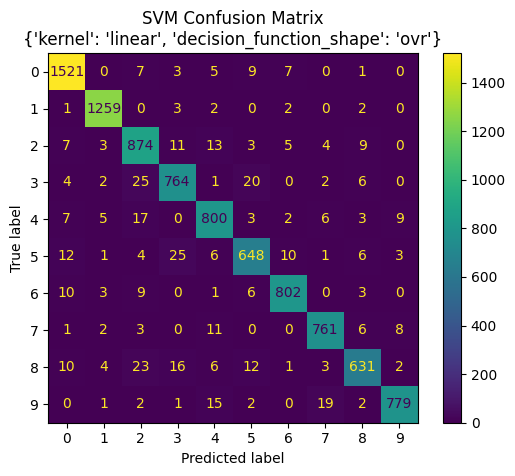

Config: {'kernel': 'poly', 'decision_function_shape': 'ovr', 'degree': 2}, Accuracy Rate: 96.82%, Training Time: 18.7884s


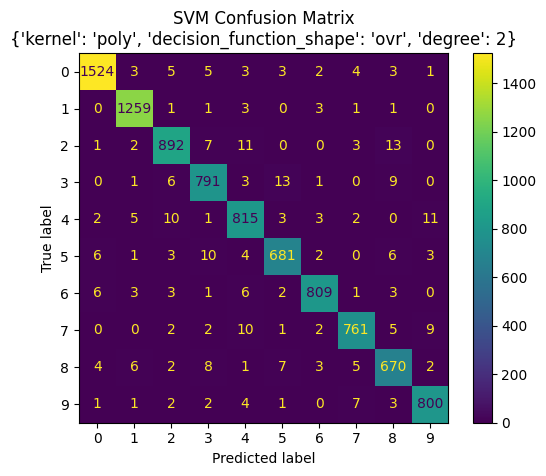

Config: {'kernel': 'poly', 'decision_function_shape': 'ovr', 'degree': 3}, Accuracy Rate: 96.90%, Training Time: 22.8730s


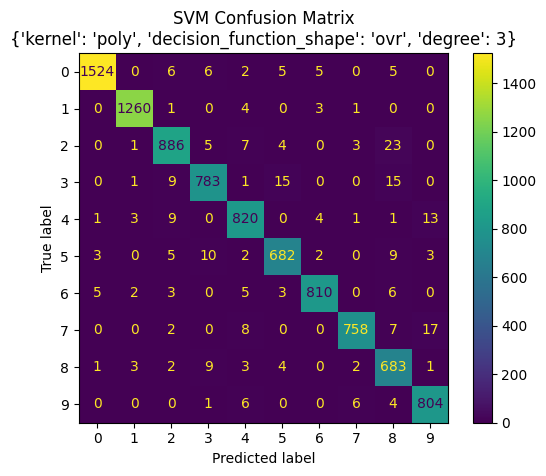

In [4]:
svm_results = train_evaluate_svm(features, labels)

## Main Execution

In [ ]:
all_results = []

all_results.extend(dt_results)
all_results.extend(knn_results)
all_results.extend(svm_results)

print("\n--- Final Comparison ---")
# Group by model
model_groups = {}
for res in all_results:
    model = res['model']
    if model not in model_groups:
        model_groups[model] = []
    model_groups[model].append(res)
    
for model, res_list in model_groups.items():
    print(f"\nModel: {model}")
    for res in res_list:
        print(f"  Config: {res['config']}")
        print(f"  Accuracy Rate: {res['accuracy']:.2%}")
        print(f"  Training Time: {res['time']:.4f}s")

analyze_results(all_results)